In [1]:
#General imports
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import pathlib
from pathlib import Path

#built facbook's library for fastmri!
import fastmri
from fastmri.data import subsample
from fastmri.data import transforms as T
from fastmri.data import mri_data, transforms

#scipy's fourier stuff
from scipy.fftpack import fft2, ifft2, fftshift, ifftshift

In [5]:
#reading in data...

#path to data
dataDir = "/Users/DavidRimel/Desktop/CMSE890/Project/projectData/"
test_file = "test/" #"knee_multicoil_test_v2.tar.gz"
train_file = "train/" #"multicoil_val.tar.gz"

# Create a mask function
mask_func = subsample.RandomMaskFunc(center_fractions=[0.08, 0.04], accelerations=[4, 8])

# Thanks facebook!
def data_transform(kspace, mask, target, data_attributes, filename, slice_num):
    # Transform the data into appropriate format
    # Here we simply mask the k-space and return the result
    kspace = transforms.to_tensor(kspace)
    masked_kspace, _ = transforms.apply_mask(kspace, mask_func)
    return masked_kspace

def rss(A):
    return np.sqrt(np.sum(A**2,axis=0))

train_dataset = mri_data.SliceDataset(
    root=pathlib.Path(dataDir+"single_train_knee/singlecoil_train"),
    #transform=data_transform,
    #sample_rate=1,
    challenge='singlecoil'
)

test_dataset = mri_data.SliceDataset(
    root=pathlib.Path(dataDir+"single_val_knee/singlecoil_val"),
    #transform='kspace',
    #sample_rate=1,
    challenge='singlecoil'
)

#multicoil dataset is tooo big...
#train_multi_dataset = mri_data.SliceDataset(
#    root=pathlib.Path(dataDir+"train/"),
    #transform='kspace',
    #sample_rate=1,
#    challenge='multicoil'
#)

#test_multi_dataset = mri_data.SliceDataset(
#    root=pathlib.Path(dataDir+"test"),
    #transform='kspace',
    #sample_rate=1,
#    challenge='multicoil'
#)

print("num. train samples = " + str(len(train_dataset)))
print("num. test samples = " + str(len(test_dataset)))
help(mri_data.SliceDataset)

KeyError: 'Unable to open object (free block size is zero?)'

In [ ]:
m_kspace = train_dataset[15] #indice here is for the slice!
#print(m_kspace)
kspace = m_kspace[:,:,0].numpy()
plt.imshow(np.abs(kspace))
plt.show()

ifft_kspace = np.abs(ifftshift(ifft2((kspace))))
ifft_kspace_log =  np.log( ifft_kspace + 1e-9 )     
ifft_kspace =  ifft_kspace       
plt.imshow(ifft_kspace,cmap='gray')
plt.show()

kspace, mask, target, attrs, fname, dataslice = train_multi_dataset[15]
coil_num = 12
coil_kspace = kspace[coil_num,:,:]
kspace_shape = kspace[coil_num,:,:].shape

kspace_log = np.abs(coil_kspace)

plt.imshow(kspace_log,cmap='gray')
plt.show()

ifft_kspace = np.abs(ifftshift(ifft2((coil_kspace))))
ifft_kspace_log =  np.log( ifft_kspace + 1e-9 )     
ifft_kspace =  ifft_kspace       
plt.imshow(ifft_kspace,cmap='gray')
plt.show()

In [3]:
# rms reconstruction...
num_coil = 15

#choose which dataset to use...
index = 16
kspace, mask, target, attrs, fname, dataslice = train_multi_dataset[index]

print(kspace.shape)
#first we ill inverse fourier each coil
m = np.zeros(shape=kspace.shape)
for i in range(num_coil):
    print(kspace[i].shape)
    m[i] = np.abs(ifftshift(ifft2(kspace[i])))
M = rss(m)

plt.imshow(M ,cmap='gray')
plt.show()

NameError: name 'train_multi_dataset' is not defined

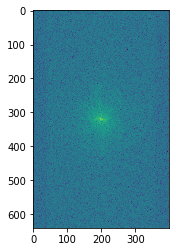

0.25


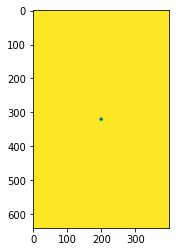

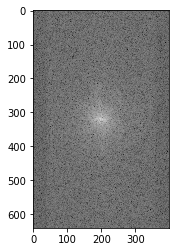

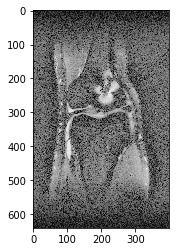

In [6]:
k_M = fftshift(fft2(M))
plt.imshow(np.log(np.abs(k_M)  + 1e-9))
plt.show()

hx = k_M.shape[0]//2
hy = k_M.shape[1]//2

x=np.arange(0,k_M.shape[0],1)
y=np.arange(0,k_M.shape[1],1)

xx, yy = np.meshgrid(x, y, sparse=False, indexing='ij')
d = np.sqrt(xx*xx+yy*yy)
sigma, mux, muy = 3.0, hx, hy
g = np.exp(-( ((xx - mux)**2 + (yy - muy)**2)  / ( 2.0 * sigma**2 ) ) )
ramp = (1.0 - 0.75*g)
print(np.min(ramp))
plt.imshow(ramp)
plt.show()


plt.imshow(np.log(np.abs(k_M)*ramp + 1e-9),cmap='gray')
plt.show()

plt.imshow(np.log(np.abs(ifft2((k_M)*ramp))+1e-9),cmap='gray')
plt.show()

Keys: ['ismrmrd_header', 'kspace', 'mask']
Attrs: {'acceleration': 4, 'acquisition': 'CORPD_FBK', 'num_low_frequency': 29, 'patient_id': '1446da3b027e1b2731daad9eec676f9e7b7ebc32cc2be79924a1c6a832dfe4aa'}
complex64
(32, 15, 640, 368)


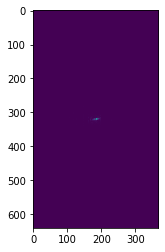

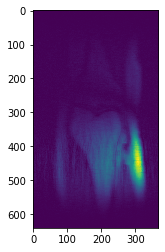

In [7]:
%matplotlib inline

import h5py
import numpy as np
from matplotlib import pyplot as plt

file_name = '/Users/DavidRimel/Desktop/CMSE890/Project/projectData/test/multicoil_test_v2/file1001234_v2.h5'
hf = h5py.File(file_name)


print('Keys:', list(hf.keys()))
print('Attrs:', dict(hf.attrs))


volume_kspace = hf['kspace'][()]
print(volume_kspace.dtype)
print(volume_kspace.shape)

samp_volume_kspace = volume_kspace[15,10]
plt.imshow(np.abs(samp_volume_kspace))
plt.show()
m = np.abs(ifftshift(ifft2(samp_volume_kspace)))
plt.imshow(m)

(640, 368)


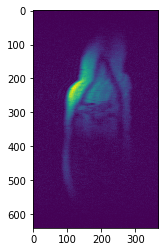

(640, 368)


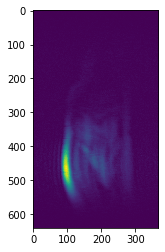

(640, 368)


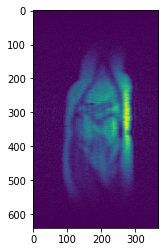

(640, 368)


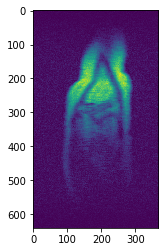

(640, 368)


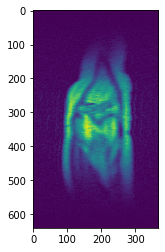

(640, 368)


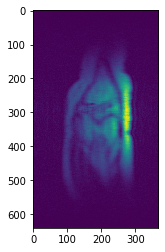

(640, 368)


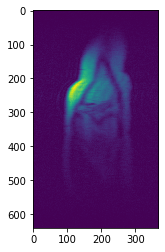

(640, 368)


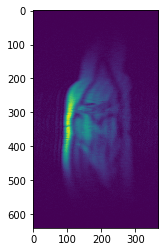

(640, 368)


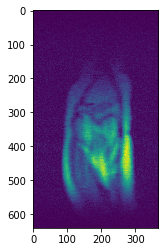

(640, 368)


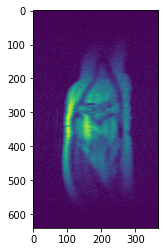

(640, 368)


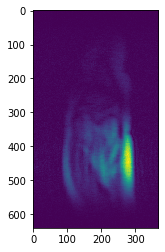

(640, 368)


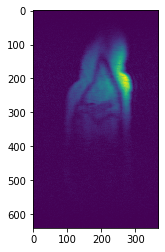

(640, 368)


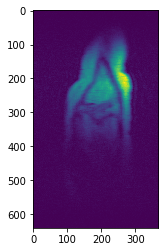

(640, 368)


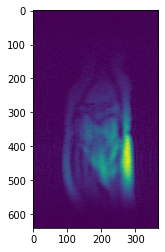

(640, 368)


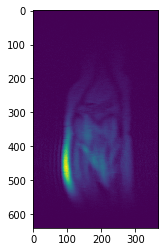

In [10]:
slice_kspace = volume_kspace[10]
# Apply Inverse Fourier Transform to get the complex image
#lice_image_abs = fastmri.complex_abs(slice_image)   # Compute absolute value to get a real image
#slice_image_rss = fastmri.rss(slice_image_abs, dim=0) # Compute absolute value to get a real image
m = np.zeros(shape=slice_kspace.shape)
for i in range(num_coil):
    print(slice_kspace[i].shape)
    m[i] = np.abs(ifftshift(ifft2(slice_kspace[i])))
    plt.imshow(m[i])
    plt.show()
M = rss(m)

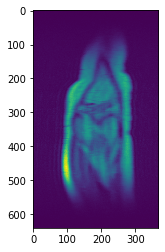

In [9]:
plt.imshow(np.abs(M))